# 代表的なデータ可視化ライブラリ：Seaborn

書籍中の図を再現するためのNotebook。

なお、サポートサイトに掲載しない内容なので、コメントは少なめ。ご了承ください。

## 初期設定

In [11]:
# tag:hide
# warningsモジュールのインポート
import warnings

# データ解析や機械学習のライブラリ使用時の警告を非表示にする目的で警告を無視
# 本書の文脈では、可視化の学習に議論を集中させるために選択した
# ただし、学習以外の場面で、警告を無視する設定は推奨しない
warnings.filterwarnings("ignore")

In [12]:
!pip install japanize_matplotlib

In [13]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
sns.set_style("darkgrid")  # スタイルを変更

In [15]:
import japanize_matplotlib

In [16]:
PATH_CE = Path("../../data/cm/input/cm_ce.csv")

## バージョン確認

In [17]:
sns.__version__

'0.12.2'

## 可視化

In [7]:
df_ce = pd.read_csv(PATH_CE)

In [8]:
# マンガ作品ごとの掲載話数を集計するためのDataFrameを作成
# 'groupby' と 'nunique' を使用して、各マンガ作品ごとにユニークな 'ceid'（掲載話数）を数える
df_bar = df_ce.groupby(["ccname"])["ceid"].nunique().reset_index(name="n_ce")

# 掲載話数が多い順にデータを並び替えて、上位N_CC件のデータを選択
# 'sort_values' でソートし、'head(20)' で上位20件を取得
df_bar = df_bar.sort_values(by="n_ce", ascending=False, ignore_index=True).head(20)

# 可視化のために'rename'メソッドを用いて列名をわかりやすい名前に変更
df_bar = df_bar.rename(columns={"ccname": "マンガ作品名", "n_ce": "合計話数"})

In [9]:
# Matplotlibと表示順序を合わせるために降順ソート
df_bar = df_bar.sort_values("合計話数", ignore_index=True)

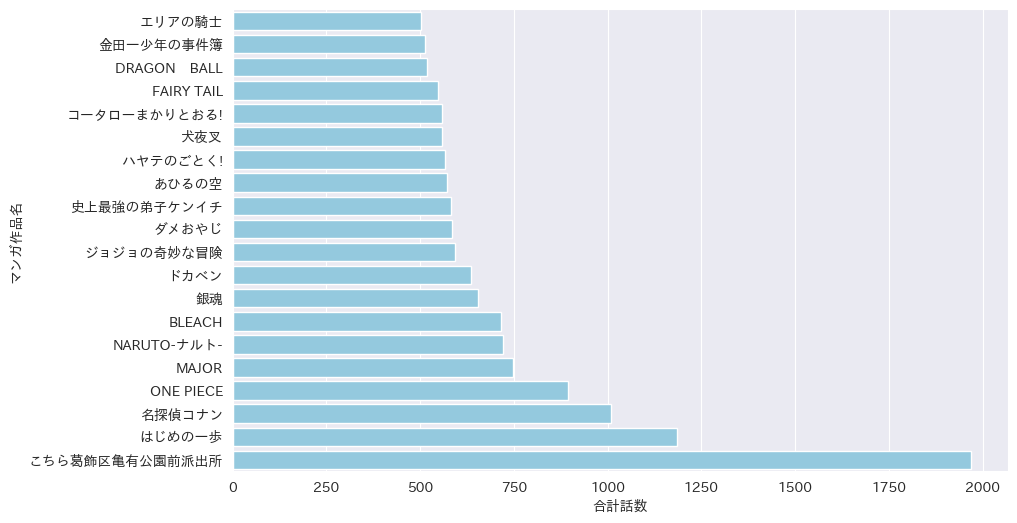

In [10]:
# グラフのサイズを指定
plt.figure(figsize=[10, 6])

# Seabornで横棒グラフを描画
sns.barplot(x="合計話数", y="マンガ作品名", data=df_bar, color="skyblue")

# X軸のラベルを設定
plt.xlabel("合計話数")
# Y軸のラベルを設定
plt.ylabel("マンガ作品名")

# グラフを表示
plt.show()